In [1]:
import sys
sys.path.append('../src')
import os
import pandas as pd
from data.make_dataset import load_data, preprocess
from models.train_model import train_model
from models.predict_model import load_model, predict
from tests.statistical_test import perform_stat_tests
from sklearn.metrics import f1_score
from visualization.visualize import plot_monthly_performance, plot_ks_results



In [2]:
target_col = "high_tip"

# Cargar y procesar datos de enero 2020 (entrenamiento)
train_data, features = preprocess(load_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet'), target_col=target_col)


In [3]:
# Entrenar modelo
model = train_model(train_data, features, target_col)

In [4]:
# Inicializar el diccionario de resultados
monthly_performance = {}
ks_results = {}

In [5]:
# Lista de meses a analizar
months = ['02', '03', '04']

In [6]:
# Cargar datos de prueba, predecir y realizar test estadísticos para cada mes
for month in months:
    test_data, _ = preprocess(load_data(f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-{month}.parquet'), target_col=target_col)
    predictions = predict(test_data, model, features)
    f1 = f1_score(test_data[target_col], predictions)
    monthly_performance[month] = f1
    ks_stats = perform_stat_tests(train_data, test_data, features)
    ks_results[month] = ks_stats
    print(f'Month: 2020-{month}, F1 Score: {f1}')
    for feature, (ks_stat, ks_pvalue) in ks_stats.items():
        print(f'Feature: {feature}, KS Statistic: {ks_stat}, P-value: {ks_pvalue}')


Month: 2020-02, F1 Score: 0.7347424352945746
Feature: pickup_weekday, KS Statistic: 0.046197872214432945, P-value: 0.0
Feature: pickup_hour, KS Statistic: 0.009675775761961991, P-value: 8.976084044095011e-258
Feature: work_hours, KS Statistic: 0.02858811360805047, P-value: 0.0
Feature: pickup_minute, KS Statistic: 0.000701395410684702, P-value: 0.08881730998993087
Feature: passenger_count, KS Statistic: 0.0029479458990505636, P-value: 2.582128302359681e-24
Feature: trip_distance, KS Statistic: 0.005312530083322331, P-value: 5.247517894494335e-78
Feature: trip_time, KS Statistic: 0.017204871080821083, P-value: 0.0
Feature: trip_speed, KS Statistic: 0.035414275196859746, P-value: 0.0
Feature: PULocationID, KS Statistic: 0.004083367375378788, P-value: 2.9277249243597585e-46
Feature: DOLocationID, KS Statistic: 0.0031319499500754855, P-value: 2.171516781842462e-27
Feature: RatecodeID, KS Statistic: 0.0026164105542746396, P-value: 3.0410381295983085e-19
Month: 2020-03, F1 Score: 0.725455646

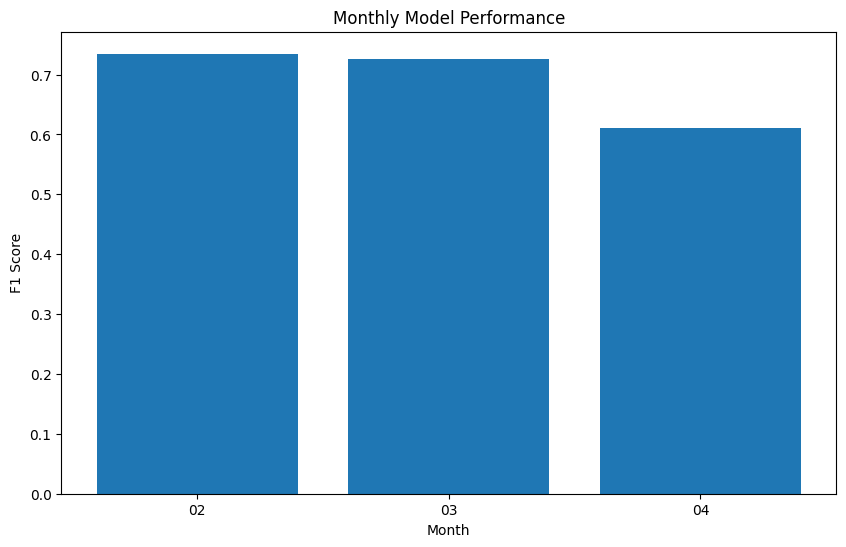

In [7]:
# Visualizar rendimiento mensual
plot_monthly_performance(monthly_performance)

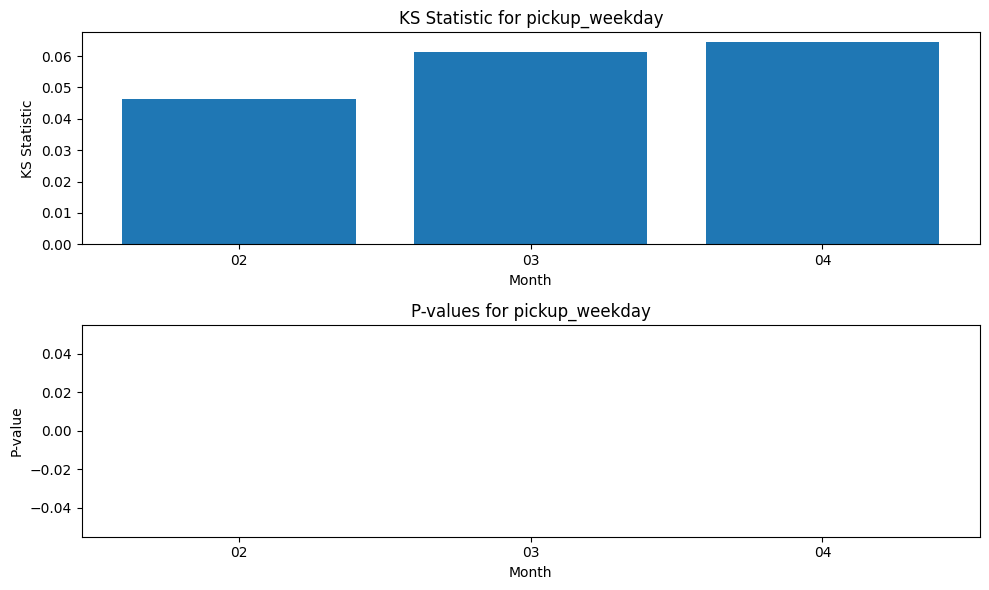

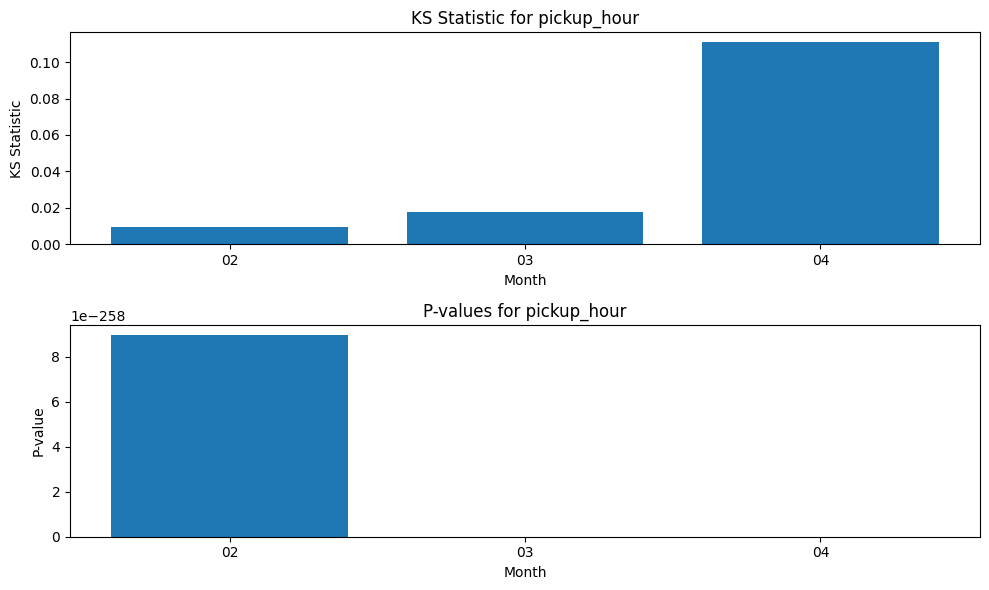

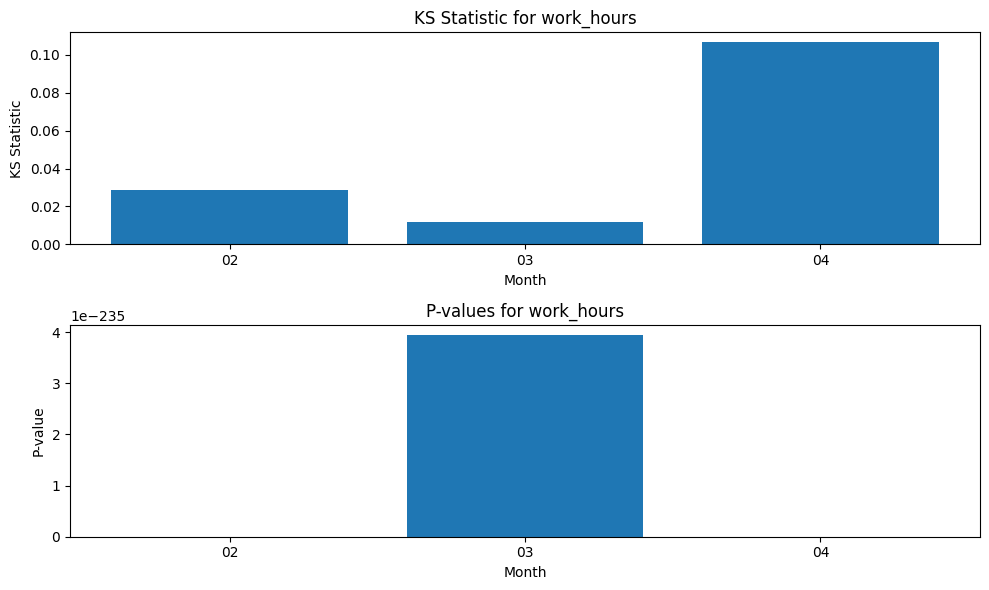

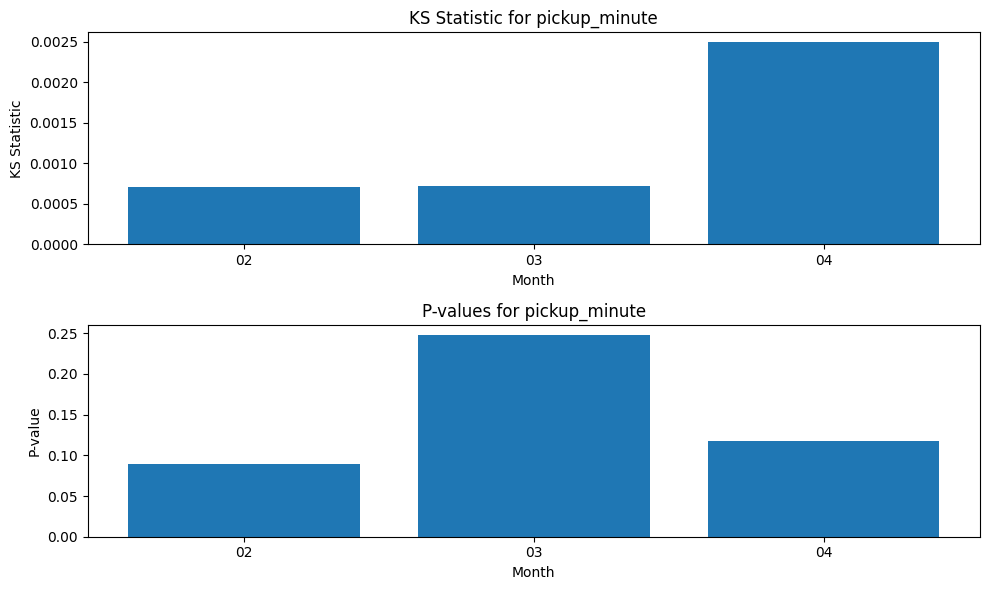

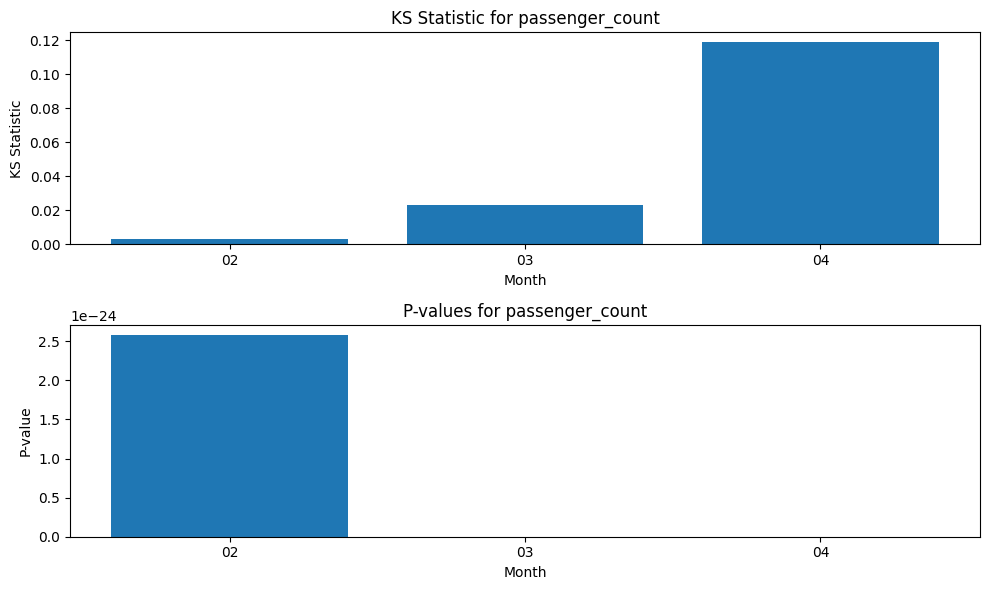

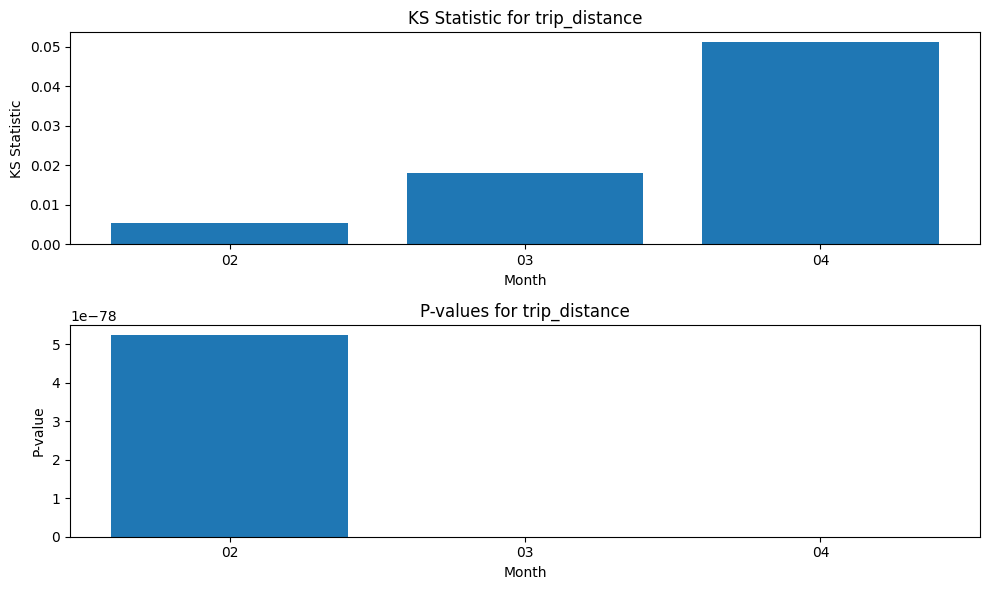

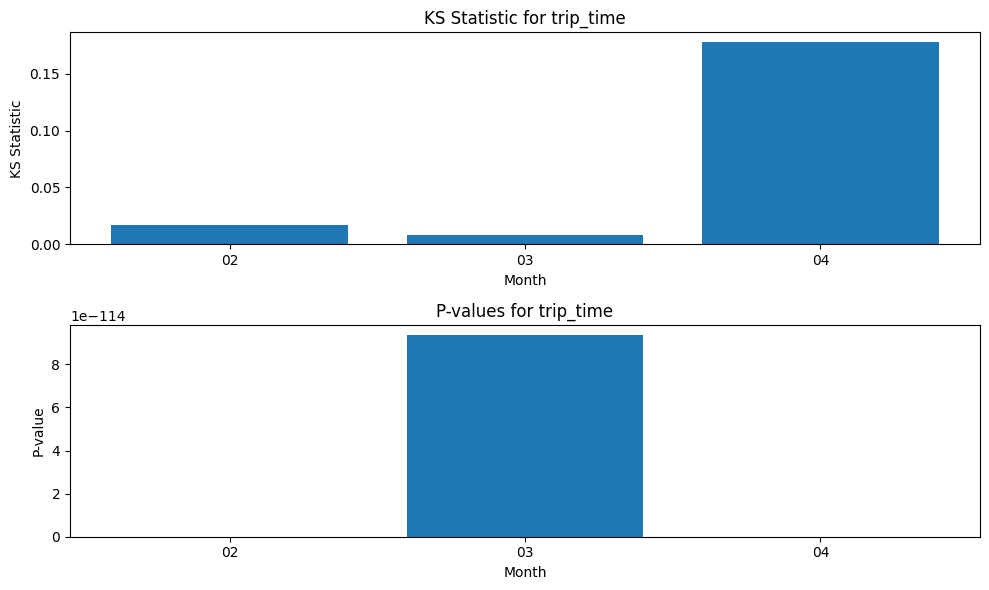

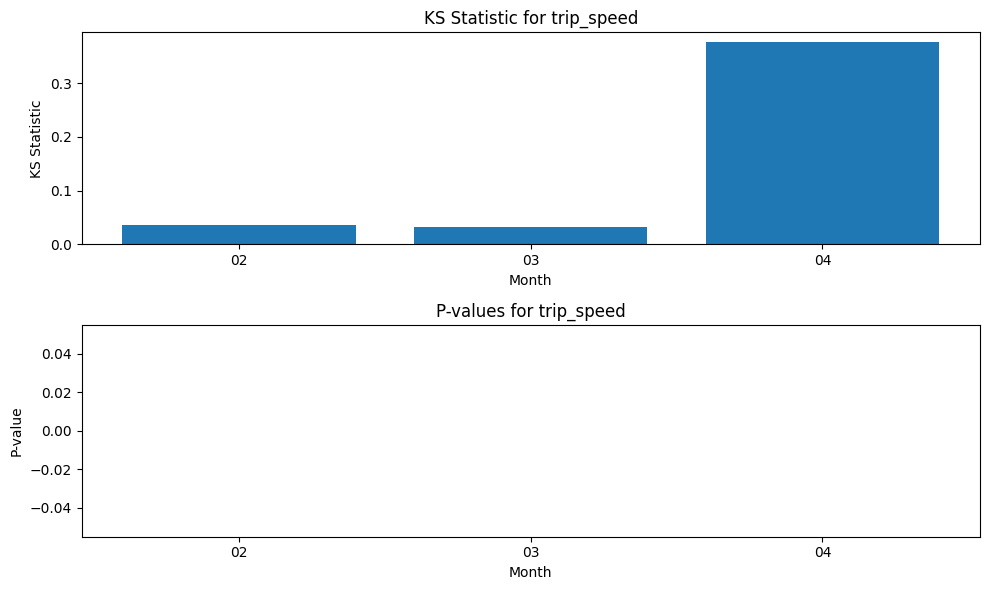

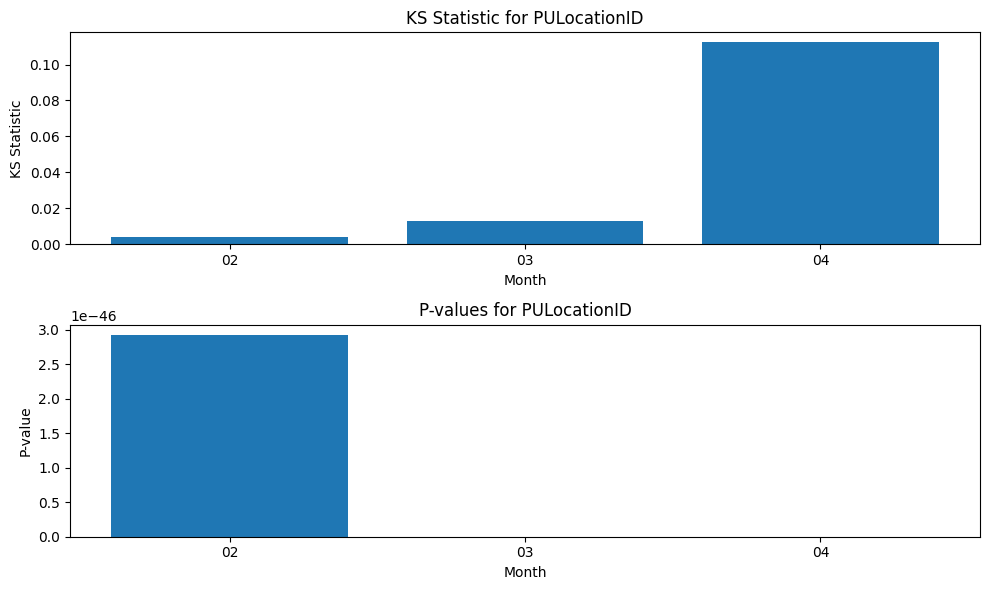

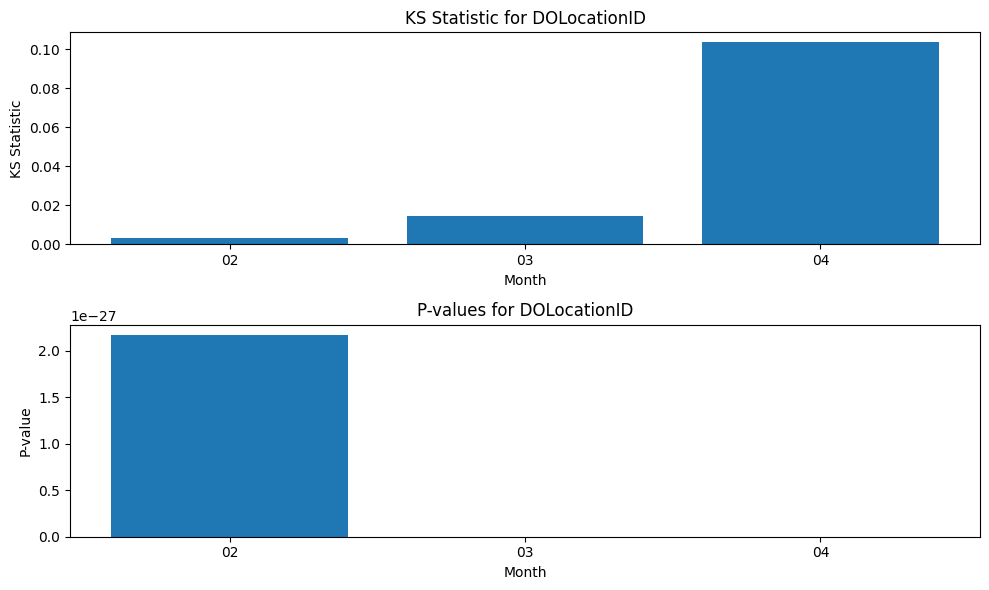

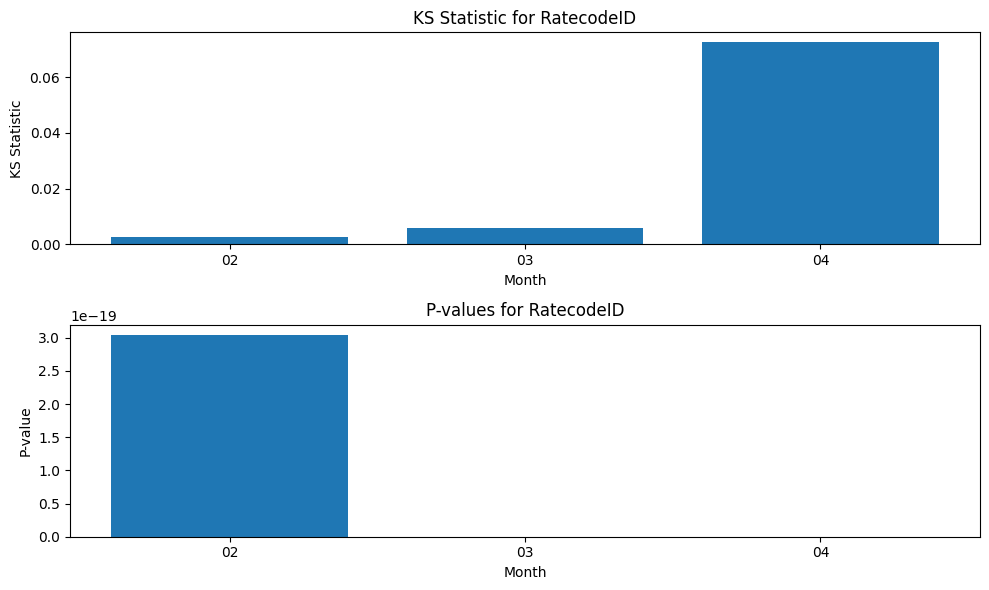

In [8]:
# Visualizar resultados de los test estadísticos
plot_ks_results(ks_results, months, features)

In [9]:
# Análisis de Resultados
for month, f1 in monthly_performance.items():
    print(f'Month: 2020-{month}, F1 Score: {f1}')
    print("KS Test Results:")
    for feature, (ks_stat, ks_pvalue) in ks_results[month].items():
        print(f'Feature: {feature}, KS Statistic: {ks_stat}, P-value: {ks_pvalue}')

Month: 2020-02, F1 Score: 0.7347424352945746
KS Test Results:
Feature: pickup_weekday, KS Statistic: 0.046197872214432945, P-value: 0.0
Feature: pickup_hour, KS Statistic: 0.009675775761961991, P-value: 8.976084044095011e-258
Feature: work_hours, KS Statistic: 0.02858811360805047, P-value: 0.0
Feature: pickup_minute, KS Statistic: 0.000701395410684702, P-value: 0.08881730998993087
Feature: passenger_count, KS Statistic: 0.0029479458990505636, P-value: 2.582128302359681e-24
Feature: trip_distance, KS Statistic: 0.005312530083322331, P-value: 5.247517894494335e-78
Feature: trip_time, KS Statistic: 0.017204871080821083, P-value: 0.0
Feature: trip_speed, KS Statistic: 0.035414275196859746, P-value: 0.0
Feature: PULocationID, KS Statistic: 0.004083367375378788, P-value: 2.9277249243597585e-46
Feature: DOLocationID, KS Statistic: 0.0031319499500754855, P-value: 2.171516781842462e-27
Feature: RatecodeID, KS Statistic: 0.0026164105542746396, P-value: 3.0410381295983085e-19
Month: 2020-03, F1 S

In [ ]:
# Comentarios sobre los resultados
# Aquí analizamos las posibles razones detrás de la variación en el F1 Score entre los meses.
# Los test estadísticos (KS Test) nos ayudan a determinar si la distribución de las características ha cambiado
# significativamente entre los meses, lo cual podría explicar la degradación del rendimiento del modelo.


# Observación del F1 Score
- Febrero 2020: F1 Score = 0.735
        El modelo tiene un rendimiento razonable en febrero, con un F1 Score de 0.735.

- Marzo 2020: F1 Score = 0.725
        El rendimiento del modelo se mantiene similar al de febrero, con un ligero descenso en el F1 Score.
        
- Abril 2020: F1 Score = 0.610
        Se observa una degradación significativa en el rendimiento del modelo en abril, con un F1 Score de 0.610.

# Análisis de los Resultados del Test KS
Los valores del test KS indican la magnitud de las diferencias en la distribución de cada característica entre el conjunto de entrenamiento (enero) y los conjuntos de prueba (febrero, marzo y abril).

- Febrero 2020:

    - Las características como pickup_weekday, pickup_hour, work_hours, trip_distance, trip_time, y trip_speed tienen valores KS bajos pero significativos, indicando cambios leves en las distribuciones.
    - Las características pickup_minute y passenger_count muestran valores KS más bajos y p-valores muy pequeños, indicando diferencias menores pero aún significativas.
    - La distribución de RatecodeID también muestra diferencias significativas.

- Marzo 2020:

    - Se observan mayores diferencias en pickup_weekday, pickup_hour, work_hours, trip_distance, y trip_time en comparación con febrero, lo que podría explicar la ligera degradación en el F1 Score.
    - Las características PULocationID y DOLocationID tienen valores KS más altos que en febrero, sugiriendo cambios en las ubicaciones de recogida y destino.

-   Abril 2020:

    - Las características pickup_weekday, pickup_hour, work_hours, passenger_count, trip_distance, trip_time, y trip_speed muestran valores KS significativamente más altos que en los meses anteriores, indicando cambios drásticos en las distribuciones de estas características.
    - trip_speed tiene un valor KS especialmente alto (0.376), lo que sugiere un cambio importante en la velocidad de los viajes en comparación con enero.
    - Estas diferencias sustanciales en las distribuciones de las características explican la degradación considerable del F1 Score en abril.